In [1]:
import pandas as pd
import numpy as np
import igraph

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.linear_model import LinearRegression
from scipy import stats
%matplotlib inline

#### Load data

In [2]:
data_foled = 'data/'
data_file = 'network.csv'
directed = False

df = pd.read_csv(data_foled+data_file, header=0, error_bad_lines=False)
df.columns = ['source_node', 'target_node']

/Users/akurochkin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(10)

,source_node,target_node
0,-1,694
1,0,545
2,0,694
3,0,734
4,0,531
5,0,557
6,0,153
7,0,723
8,0,724
9,0,539


In [4]:
tuples = [tuple(x) for x in df.values]
g = igraph.Graph.TupleList(tuples, directed = directed)

## 1.Basic network characteristics

#### Number of nodes $N$

In [5]:
number_nodes = g.vcount()
print("Number of nodes = {0}".format(number_nodes))

Number of nodes = 868


#### Number of links $L$

In [6]:
number_links = g.ecount()
print("Number of links = {0}".format(number_links))

Number of links = 5321


###### I've decided to consider Erdos_Renyi graph, in order to see if subscribers make their connections in any specific pattern or in a random way

In [7]:
erg = igraph.Graph.Erdos_Renyi(n=number_nodes, m=number_links, directed=False)

#### Average node degree $<k>$

In [8]:
g_degree = round(np.mean(g.degree()), 2)
erg_degree = round(np.mean(erg.degree()), 2)

print("Average node degree = {0}".format(g_degree))
print("Average node degree (ER) = {0}".format(erg_degree))

Average node degree = 12.26
Average node degree (ER) = 12.26


#### Min. node degree $k_{min}$

In [9]:
min_node_degree_g = min(g.degree())
min_node_degree_erg = min(erg.degree())

print("Min. node degree = {0}".format(min_node_degree_g))
print("Min. node degree (ER) = {0}".format(min_node_degree_erg))

Min. node degree = 1
Min. node degree (ER) = 3


#### Max. node degree $k_{max}$

In [10]:
max_node_degree_g = max(g.degree())
max_node_degree_erg = max(erg.degree())

print("Max. node degree = {0}".format(max_node_degree_g))
print("Max. node degree (ER) = {0}".format(max_node_degree_erg))

Max. node degree = 743
Max. node degree (ER) = 26


#### Average degree of the nearest neighbour $<knn>$

In [11]:
erg_knn = np.array(erg.knn()[0])

In [12]:
len(erg_knn),len(erg_knn[erg_knn!=np.nanmean])

(868, 868)

In [13]:
g_knn = round(np.mean(g.knn()[0]), 2)
erg_knn = round(np.nanmean(erg.knn()[0]), 2)

print("Average degree of the nearest neighbour = {0}".format(g_knn))
print("Average degree of the nearest neighbour (ER) = {0}".format(erg_knn))

Average degree of the nearest neighbour = 374.91
Average degree of the nearest neighbour (ER) = 13.21


#### Assortativity mixing by degrees $r$

In [14]:
g_assortativity = round(g.assortativity_degree(), 3)
erg_assortativity = round(erg.assortativity_degree(), 3)

print("Assortativity mixing by degrees = {0}".format(g_assortativity))
print("Assortativity mixing by degrees (ER) = {0}".format(erg_assortativity))

Assortativity mixing by degrees = -0.414
Assortativity mixing by degrees (ER) = 0.004


#### Size of the largest connected component GCC: number of nodes and % of nodes

In [15]:
g_lcc_nodes = g.clusters(mode='weak').giant().vcount()
erg_lcc_nodes = erg.clusters(mode='weak').giant().vcount()

print("Number of nodes in the LCC = {0}".format(g_lcc_nodes))
print("Number of nodes in the LCC (ER) = {0}".format(erg_lcc_nodes))

Number of nodes in the LCC = 868
Number of nodes in the LCC (ER) = 868


In [16]:
g_lcc_nodes = g.clusters(mode='weak').giant().vcount()
erg_lcc_nodes = erg.clusters(mode='weak').giant().vcount()

print("% of nodes in the LCC = {0}".format(g_lcc_nodes/g.vcount()))
print("% of nodes in the LCC (ER) = {0}".format(erg_lcc_nodes/erg.vcount()))

% of nodes in the LCC = 1.0
% of nodes in the LCC (ER) = 1.0


#### Average shortest path length $<l>$

In [17]:
def avg_sp(paths):
    result = []   
    for p in paths:
        tmp = np.array(p)
        result.append(np.mean(tmp[tmp<np.inf]))
    return np.mean(result)

In [18]:
g_sp = g.shortest_paths()

In [19]:
erg_sp = erg.shortest_paths()

In [20]:
g_avg_sp = round(avg_sp(g_sp),3)
erg_avg_sp = round(avg_sp(erg_sp),3)

print("Average shortest path length = {0}".format(g_avg_sp))
print("Average shortest path length (ER) = {0}".format(erg_avg_sp))

Average shortest path length = 2.059
Average shortest path length (ER) = 2.953


In [21]:
print("Average shortest path length = {0}".format(g.average_path_length(directed=False)))
print("Average shortest path length (ER) = {0}".format(erg.average_path_length(directed=False)))

Average shortest path length = 2.061667171612478
Average shortest path length (ER) = 2.9563088992712836


In [22]:
print(len(g.components()))

1


In [23]:
print(len(erg.components()))

1


#### Diameter of the network (max value of shortest path length) $l_{max}$

In [24]:
def max_sp(paths):
    result = []
    
    for p in paths:
        tmp = np.array(p)
        result.append(np.mean(tmp[tmp<np.inf]))
    return max(result)

In [25]:
g_max_sp = round(max_sp(g_sp),3)
erg_max_sp = round(max_sp(erg_sp),3)

print("Average shortest path length = {0}".format(g_max_sp))
print("Average shortest path length (ER) = {0}".format(erg_max_sp))

Average shortest path length = 3.122
Average shortest path length (ER) = 3.538


In [26]:
print("Average shortest path length = {0}".format(g.diameter()))
print("Average shortest path length (ER) = {0}".format(erg.diameter()))

Average shortest path length = 4
Average shortest path length (ER) = 5


#### Global transitivity $C$

In [27]:
g_transitivity = round(g.transitivity_undirected(),3)
erg_transitivity = round(erg.transitivity_undirected(),3)

print("Global transitivity = {0}".format(g_transitivity))
print("Global transitivity (ER) = {0}".format(erg_transitivity))

Global transitivity = 0.07
Global transitivity (ER) = 0.014


#### Average clustering coefficient $<c>$

In [28]:
np.nanmean(g.transitivity_local_undirected())

0.8936279316341452

In [29]:
g.transitivity_avglocal_undirected()

0.8936279316341451

In [30]:
np.nanmean(erg.transitivity_local_undirected())

0.013945819312878626

In [31]:
erg.transitivity_avglocal_undirected()

0.01394581931287865

#### Average betweenness centrality $<b>$

In [32]:
g_betweenness = round(np.mean(g.edge_betweenness()),3)
erg_betweenness = round(np.mean(erg.edge_betweenness()),3)

print("Average betweenness centrality = {0}".format(g_betweenness))
print("Average betweenness centrality (ER) = {0}".format(erg_betweenness))

Average betweenness centrality = 145.792
Average betweenness centrality (ER) = 209.057


In [33]:
np.mean(g.betweenness(directed=False))

460.23271889400866

In [34]:
np.mean(erg.betweenness())

848.0599078341011

In [35]:
import seaborn as sn

<br/><br/>
### Degree distribution

In [36]:
# g_dd = g.degree_distribution().__plot__
# erg_dd = erg.degree_distribution()

In [37]:
g_d = g.degree()
g_d_unique, g_d_counts = np.unique(g_d, return_counts=True)

erg_d = erg.degree()
erg_d_unique, erg_d_counts = np.unique(erg_d, return_counts=True)

In [38]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

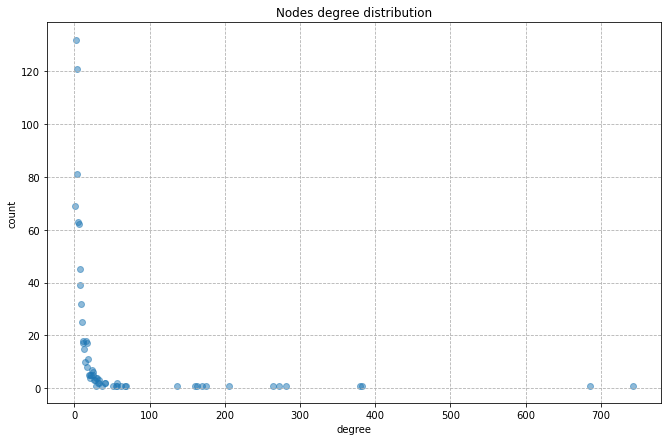

In [39]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)

plt.title('Nodes degree distribution')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.grid(linestyle='dashed')
plt.show() # show the plot

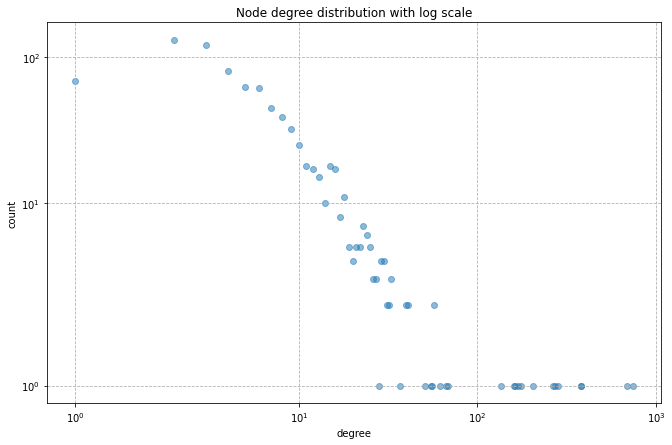

In [40]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)

plt.title('Node degree distribution with log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('symlog')
plt.xscale('symlog')
plt.grid(linestyle='dashed')
plt.show() # show the plot

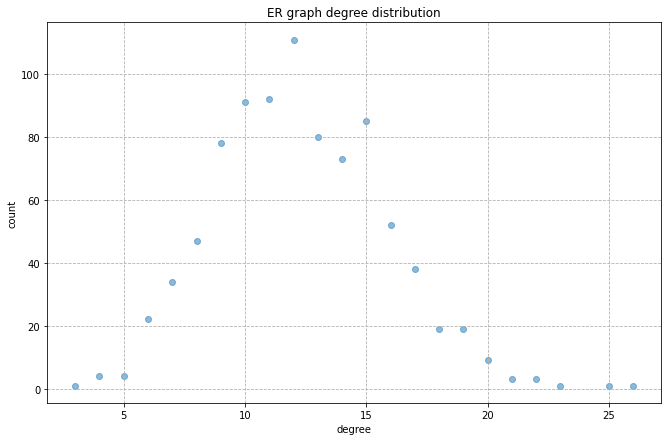

In [41]:
figure(figsize=(11,7))

plt.scatter(x = erg_d_unique,
            y = erg_d_counts, 
            alpha=0.5)

plt.title('ER graph degree distribution')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.grid(linestyle='dashed')
plt.show() # show the plot

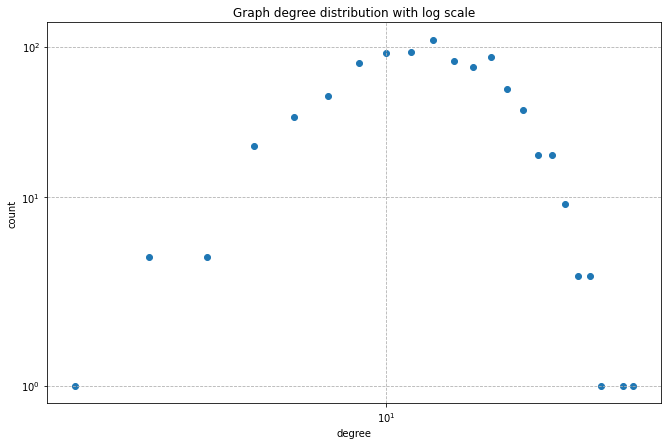

In [42]:
figure(figsize=(11,7))

plt.scatter(x = erg_d_unique,
            y = erg_d_counts, 
            )

plt.title('Graph degree distribution with log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('symlog')
plt.xscale('symlog')
plt.grid(linestyle='dashed')
plt.show() # show the plot

## Correlations

#### Node clustering coefficient $c$ vs node degree $k: c(k)$

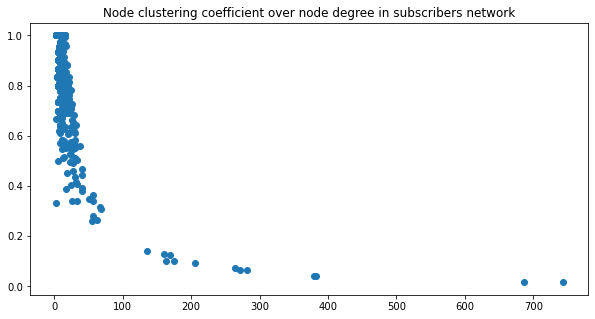

In [43]:
plt.figure(figsize=(10,5))
plt.title('Node clustering coefficient over node degree in subscribers network')
plt.scatter(g.degree(),g.transitivity_local_undirected())
plt.show()

In [44]:
import seaborn as sns

In [45]:
cliques = np.array(list(map(len,g.cliques())))

In [46]:
sum(cliques==3),sum(cliques==4),sum(cliques==5),sum(cliques>5)

(21207, 65128, 155153, 2305390)

<BarContainer object of 3 artists>

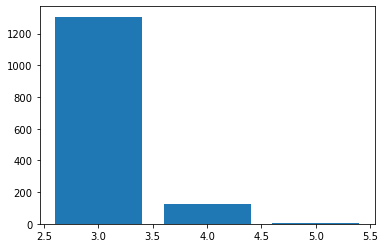

In [47]:
plt.bar([3,4,5],[1306,125,7])

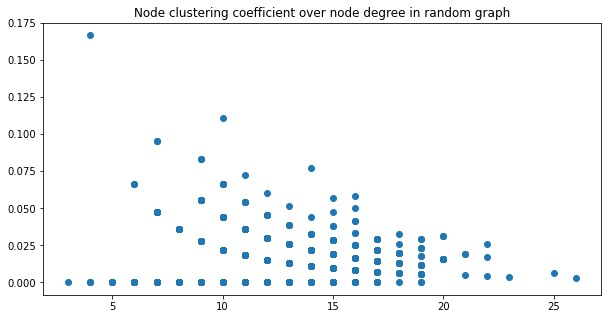

In [48]:
plt.figure(figsize=(10,5))
plt.title('Node clustering coefficient over node degree in random graph')
plt.scatter(erg.degree(),erg.transitivity_local_undirected())
plt.show()

#### Average shortest path length $l$ from node to other nodes vs node degrees $k$

In [49]:
np.array(g_sp).shape

(868, 868)

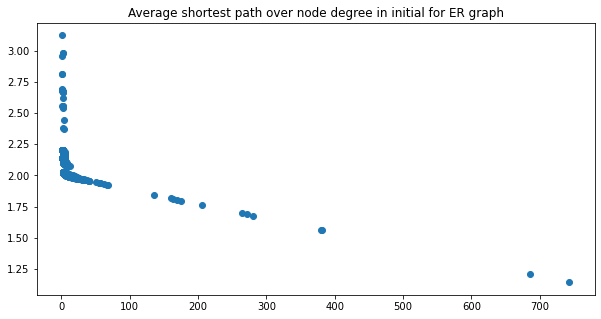

In [50]:
plt.figure(figsize=(10,5))
plt.title('Average shortest path over node degree in initial for ER graph')
plt.scatter(g.degree(),list(map(lambda x: np.mean(np.array(x)[np.array(x)<np.inf]),g_sp)))
plt.show()

### Community structure of the network using Louvain algorithm

In [51]:
p = g.community_multilevel()

#### Modularity $Q$ of the optimal partition

In [52]:
q = g.modularity(p)

In [53]:
print(q)

0.22930267363367993


#### The number $n_c$ of clusters in optimal partition

In [54]:
len(p)

11

#### Distribution of cluster sizes of the optimal partition $P(n_c)$

In [55]:
import seaborn as sns

In [56]:
clusters_sizes = np.array(list(map(len,p)))

In [57]:
comps = np.array(list(map(len,g.components())))

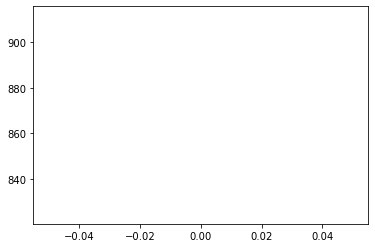

In [58]:
plt.plot(np.sort(comps))

/Users/akurochkin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akurochkin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


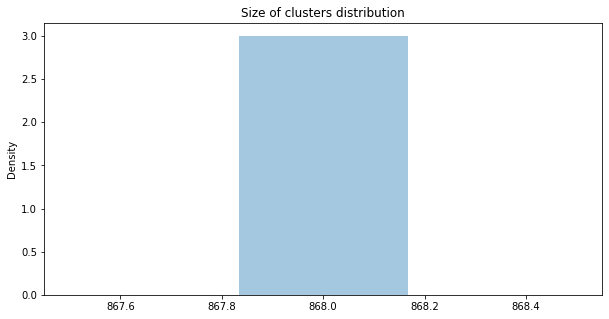

In [59]:
plt.figure(figsize=(10,5))
plt.title('Size of clusters distribution')
sns.distplot(comps,bins=3)
plt.show()

# HW2

# Task 2

###### Local clustering coefficient as a function of node degree k (note: for plot to look better, average Cfor all the nodes with given k)

In [60]:
data = pd.DataFrame(columns=['lcc','deg'])
data['lcc'] = g.transitivity_local_undirected()
data['deg'] = g.degree()
to_plot = data.groupby('deg').agg({'lcc':np.nanmean}).dropna().reset_index()

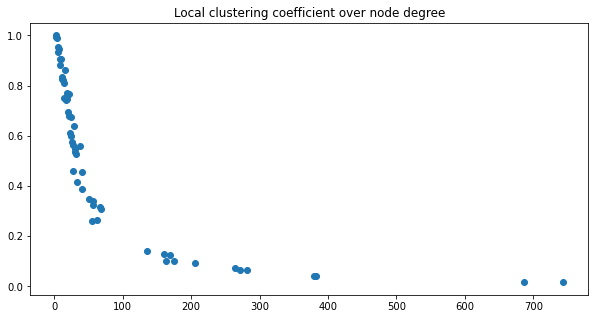

In [61]:
plt.figure(figsize=(10,5))
plt.title('Local clustering coefficient over node degree')
plt.scatter(x=to_plot['deg'],y=to_plot['lcc'])
#plt.yscale('log')
#plt.xscale('log')
plt.show()

###### Betweenness centrality of a node $k$ vs its’ degree $kC^B(k)$

In [62]:
data = pd.DataFrame(columns=['btw','deg'])
data['btw'] = g.betweenness(directed=False)
data['deg'] = g.degree()
to_plot = data.groupby('deg').agg({'btw':np.nanmean}).dropna().reset_index()

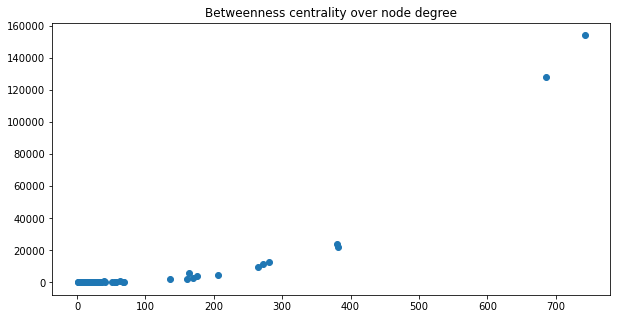

In [63]:
plt.figure(figsize=(10,5))
plt.title('Betweenness centrality over node degree')
plt.scatter(x=to_plot['deg'],y=to_plot['btw'])
plt.show()

<h6> Plot distribution (for your network and corresponding Erdos-Renyi graph). Fit themwith power-law function and exponential function (do not forget to calculate ratio chi2/Ndof)<br></h6>
a.Distribution of node degrees P(k)<br>
b.Cumulative node degree distribution<br>
c.Distribution of shortest paths length P(l)<br>
d.Distribution of local clustering coefficients P(C)<br>


###### a.Distribution of node degrees P(k)

In [64]:
data_regression = pd.DataFrame(g.degree(),columns=['node_degree'])
data_regression['degree_counts'] = 1
data_regression = data_regression.groupby('node_degree').agg({'degree_counts':'sum'})
data_regression.reset_index(inplace=True)

data_regression['log_node_degree'] = np.log(data_regression['node_degree'])
data_regression['log_degree_counts'] = np.log(data_regression['degree_counts']) 

In [65]:
lr_degrees_power = LinearRegression()

In [66]:
lr_degrees_power.fit(data_regression[['log_node_degree']],data_regression[['log_degree_counts']])

LinearRegression()

In [67]:
# Linear regression coefficients 
lr_degrees_power.intercept_,lr_degrees_power.coef_

(array([4.81719141]), array([[-0.94837817]]))

In [68]:
data_regression['prediction_lr_degreess_power'] = np.exp(8.75106327 + np.log(data_regression['node_degree']) * (-2.43505701))

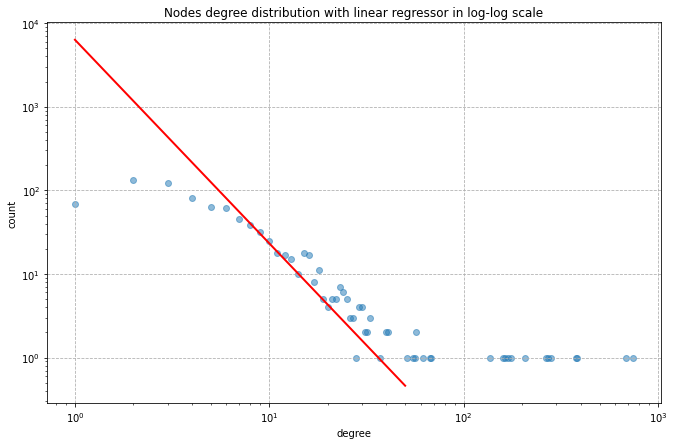

In [69]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)
plt.title('Nodes degree distribution with linear regressor in log-log scale')
plt.plot([x for x in range(1,51)],[np.exp(8.75106327 + np.log(x) * (-2.43505701)) for x in range(1,51)],
        linewidth=2,color='r')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

# plt.scatter([x for x in range(1,51)],[8.75106327+ np.log(x) * (-2.43505701) for x in range(1,51)])
# plt.scatter(data_regression[0],data_regression['log_counts'])

In [70]:
lr_node_exponential = LinearRegression()

In [71]:
lr_node_exponential.fit(data_regression[['node_degree']],data_regression[['log_degree_counts']])

LinearRegression()

In [72]:
lr_node_exponential.intercept_,lr_node_exponential.coef_

(array([1.93831565]), array([[-0.00504351]]))

In [73]:
data_regression['prediction_lr_degreess_exponential'] = np.exp(5.60650973 + (data_regression['node_degree']) * (-0.18003321))

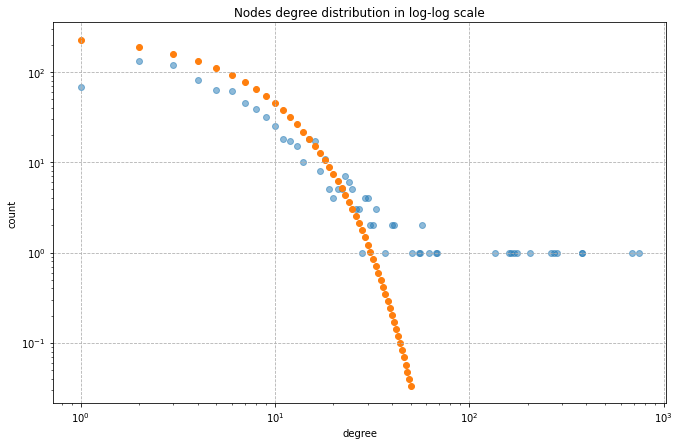

In [74]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)
plt.title('Nodes degree distribution in log-log scale')
plt.scatter([x for x in range(1,51)],[np.exp(5.60650973+ x * (-0.18003321))  for x in range(1,51)])
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

# plt.scatter([x for x in range(1,51)],[np.exp(5.60650973+ x * (-0.18003321)) for x in range(1,51)])
# plt.scatter(data_regression[0],data_regression['counts'])

In [77]:
# TODO: fix line below
# print('Chi2 statistics for power-law function: {0}'.format(stats.chisquare(data_regression['degree_counts'], data_regression['prediction_lr_degreess_power'])))

In [78]:
# TODO: fix line below
# print('Chi2 statistics for exponential function: {0}'.format(stats.chisquare(data_regression['degree_counts'], data_regression['prediction_lr_degreess_exponential'])))

###### b.Cumulative node degree distribution

In [79]:
data_regression['cumulative_node_degree'] = np.cumsum(data_regression['degree_counts'][::-1])[::-1]

In [80]:
data_regression['log_cumulative_node_degree'] = np.log(data_regression['cumulative_node_degree'])

In [81]:
lr_cum_degrees_power = LinearRegression()

In [82]:
lr_cum_degrees_power.fit(data_regression[['log_node_degree']],data_regression[['log_cumulative_node_degree']])

LinearRegression()

In [83]:
# Linear regression coefficients 
lr_cum_degrees_power.intercept_,lr_cum_degrees_power.coef_

(array([7.56181087]), array([[-1.07622381]]))

In [84]:
data_regression['pred_cumulativ_degreess_power'] = np.exp(10.12066213 + np.log(data_regression['node_degree']) * (-2.51804516))

In [85]:
data_regression.head()

,node_degree,degree_counts,log_node_degree,log_degree_counts,prediction_lr_degreess_power,prediction_lr_degreess_exponential,cumulative_node_degree,log_cumulative_node_degree,pred_cumulativ_degreess_power
0,1,69,0.000000,4.234107,6317.401642,227.346781,868,6.766192,24851.220127
1,2,132,0.693147,4.882802,1168.189472,189.889687,799,6.683361,4338.509899
2,3,121,1.098612,4.795791,435.232215,158.603932,667,6.502790,1562.913167
3,4,81,1.386294,4.394449,216.017078,132.472740,546,6.302619,757.414245
4,5,63,1.609438,4.143135,125.460404,110.646859,465,6.142037,431.826887


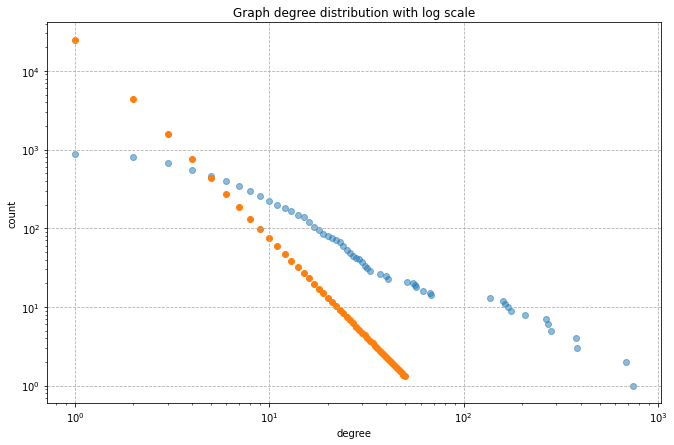

In [86]:
figure(figsize=(11,7))

plt.scatter(x = data_regression['node_degree'],
            y = data_regression['cumulative_node_degree'], 
            alpha=0.5)
plt.title('Graph degree distribution with log scale')
plt.scatter([x for x in range(1,51)],[np.exp(10.12066213 + np.log(x) * (-2.51804516)) for x in range(1,51)])
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

# plt.scatter([x for x in range(1,51)],[8.75106327+ np.log(x) * (-2.43505701) for x in range(1,51)])
# plt.scatter(data_regression[0],data_regression['log_counts'])

In [87]:
lr_cum_node_exponential = LinearRegression()

In [88]:
lr_cum_node_exponential.fit(data_regression[['node_degree']],data_regression[['log_cumulative_node_degree']])

LinearRegression()

In [89]:
lr_cum_node_exponential.intercept_,lr_cum_node_exponential.coef_

(array([4.49185557]), array([[-0.00788152]]))

In [90]:
data_regression['pred_cumulativ_degreess_exp'] = np.exp(7.04924969 + (data_regression['node_degree']) * (-0.19897187))

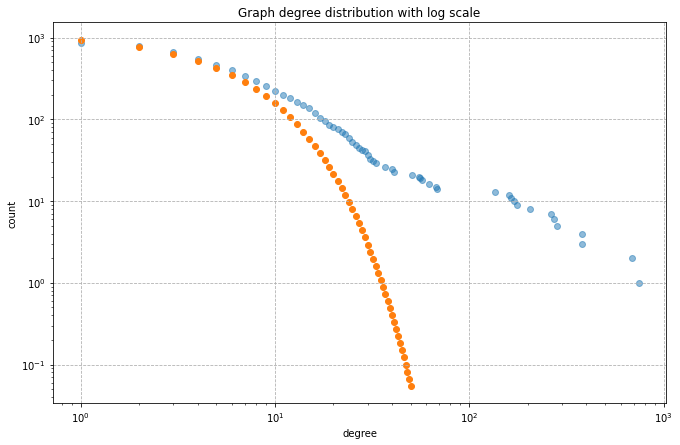

In [91]:
figure(figsize=(11,7))

plt.scatter(x = data_regression['node_degree'],
            y = data_regression['cumulative_node_degree'], 
            alpha=0.5)
plt.title('Graph degree distribution with log scale')
plt.scatter([x for x in range(1,51)],[np.exp(7.04924969 + x * (-0.19897187)) for x in range(1,51)])
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

# plt.scatter([x for x in range(1,51)],[8.75106327+ np.log(x) * (-2.43505701) for x in range(1,51)])
# plt.scatter(data_regression[0],data_regression['log_counts'])

In [94]:
# TODO: fix line below
# print('Chi2 statistics for power-law function: {0}'.format(stats.chisquare(data_regression['cumulative_node_degree'],
#                                                                          data_regression['pred_cumulativ_degreess_exp'])))

In [95]:
# TODO: fix line below
# print('Chi2 statistics for exponential function: {0}'.format(stats.chisquare(data_regression['cumulative_node_degree'],
#                                                                           data_regression['prediction_lr_degreess_exponential'])))